In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /sentiment_data.csv')
df = df.drop(columns='Unnamed: 0')
df

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


In [ ]:
df.shape

(568454, 10)

In [ ]:
# Creating a new Helpfulness column (Helpfulness=HelpfulnessNumerator/HelpfulnessDenominator)

df.insert(6,"Helpfulness",np.where(df["HelpfulnessDenominator"]==0,0,df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]))

In [ ]:
df.head()

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idlist                  568454 non-null  int64  
 1   productid               568454 non-null  object 
 2   UserId                  568454 non-null  object 
 3   ProfileName             568404 non-null  object 
 4   HelpfulnessNumerator    568454 non-null  int64  
 5   HelpfulnessDenominator  568454 non-null  int64  
 6   Helpfulness             568454 non-null  float64
 7   Score                   568454 non-null  int64  
 8   Time                    568454 non-null  int64  
 9   ReviewSummary           568379 non-null  object 
 10  ReviewText              568437 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 47.7+ MB


----

# **Check For Null Values**

In [ ]:
df.isna().sum()

idlist                     0
productid                  0
UserId                     0
ProfileName               50
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Helpfulness                0
Score                      0
Time                       0
ReviewSummary             75
ReviewText                17
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
1234,1235,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,0.041667,2,1173312000,NaN,I only used two maybe three tea bags and got p...
3314,3315,B000FVDWU4,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,0.041667,2,1173312000,NaN,I only used two maybe three tea bags and got p...
4325,4326,B002GQ6OEM,A38E8X39VB9PNQ,"Gonzo ""Nanoman""",1,2,0.500000,5,1320537600,NaN,We live in a small town with no Indian restaur...
6858,6859,B002DHN956,A1LSYR30XW7CFT,NaN,1,2,0.500000,5,1291680000,Awesome,This is 72 for the price of like 24 at the gro...
7282,7283,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,0.000000,5,1326758400,Finally!,"You cannot find this in the stores anymore, it..."
...,...,...,...,...,...,...,...,...,...,...,...
543757,543758,B001LG940E,A293HA28PN3VO4,NaN,0,1,0.000000,4,1236038400,Surprised by full flavor-found it better than ice,"We received out ""Switch"" today. I was curious ..."
552740,552741,B006HYJM66,A1TFR1S0GRVLIL,Themoro17,4,9,0.444444,1,1331078400,NaN,"I had such high hopes for this product, but al..."
560409,560410,B000XJLJGC,A3SODCU246BUW5,"Terri Lynn Huddleston ""Terri-Lynn""",0,0,0.000000,4,1342310400,NaN,"Bought this for a gift, and they loved it!"
561208,561209,B001SAXPWQ,A2DS2NADY6HFO8,AnnMarie,0,0,0.000000,5,1321574400,NaN,Order was delivered within specified time. Pro...


In [ ]:
print((142/df.shape[0])*100)  # null values percentage

0.024980033564721157


## **> There are three columns "ProfileName", "ReviewSummary" and "ReviewText" with null values and all of them are object type data.**

## **> We can drop the null values from these columns i.e. as the contribute to only 0.0249% in our dataframe so we can remove the rows with null values in this column.**

In [ ]:
to_drop = df[df.isna().any(axis=1)].index
to_drop

Index([  1234,   3314,   4325,   6858,   7282,   9969,  19465,  22234,  23391,
        24248,
       ...
       527563, 528084, 531876, 535665, 539571, 543757, 552740, 560409, 561208,
       567582],
      dtype='int64', length=142)

In [ ]:
df = df.drop(to_drop)
df

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


In [ ]:
df.shape

(568312, 11)

## **> The no.of datapoints after dropping null values are 568312.**

----

# **Check For Duplicated Values**

In [ ]:
df["ReviewText"].value_counts()

ReviewText
<a href="http                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## **> There is an duplicate value occurance : `<a href="http` which doesn't hold any meaning. So we are dropping this kind of datapoints**

In [ ]:
df[df["ReviewText"] == '<a href="http']  # dropping these rows since they don't contain any useful information.

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
275,276,B00954NYVY,A2KXDU6GKQL4OX,Michelle,0,0,0.000000,5,1317081600,Great Bold Coffee!!,"<a href=""http"
859,860,B005U1FYV4,A15NXQY6UHU57D,Mel B,0,0,0.000000,5,1328313600,"If you like certain flavored liquors and ""dark...","<a href=""http"
1047,1048,B003EML8PM,A1OIOH453XQ7K6,Mystercee,0,0,0.000000,5,1338076800,Love At First Bite....,"<a href=""http"
1545,1546,B00017LEXO,AKFRR0QE0KTT6,jc recording,1,1,1.000000,5,1266192000,Yummy Yummy Yummy!,"<a href=""http"
1929,1930,B002WD93EW,AR1AKOSLSZ3K9,"Kindredspirit0806 ""DEB""",1,3,0.333333,5,1284076800,Starbucks T-discs,"<a href=""http"
...,...,...,...,...,...,...,...,...,...,...,...
567091,567092,B000CONMAO,A3B9OAY7L4LJST,Jerrilyn Patrick,0,1,0.000000,4,1237334400,good,"<a href=""http"
567190,567191,B000Y2CI9U,A2FW5FZ3A4ZW92,BLONDIE,7,7,1.000000,5,1253318400,Annie's Homegrown Organic Beef Stroganoff Skil...,"<a href=""http"
567940,567941,B000ILIHA6,A1ORE5EC5VD8IB,K-9 Pack Leader,0,0,0.000000,5,1278806400,A High Quality Dog Treat at a Reasonable Price,"<a href=""http"
567960,567961,B000ILIHA6,AUWROVUY2VEXM,B. Lewis,0,0,0.000000,5,1240185600,Blue Dog Cookies,"<a href=""http"


In [ ]:
to_drop = df[df["ReviewText"] == '<a href="http'].index
to_drop

Index([   275,    859,   1047,   1545,   1929,   2099,   2773,   3519,   3567,
         3624,
       ...
       565323, 565851, 565930, 566785, 566813, 567091, 567190, 567940, 567960,
       568218],
      dtype='int64', length=1446)

In [ ]:
df = df.drop(to_drop)
df

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


## **> We found another similar duplicate value occurance : `<span class="tiny"> Length` which doesn't hold any meaning. So we are dropping this kind of datapoints**

In [ ]:
df[df["ReviewText"] == '<span class="tiny"> Length']  # dropping these rows since they don't contain any useful information.

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
1357,1358,B002P6CL7C,A25BOV9LZUPY50,"Specialty Sodas ""specialtysodas""",3,3,1.0,5,1334534400,Sangaria Ramune Carbonated Soft Drink Soda Rev...,"<span class=""tiny""> Length"
1643,1644,B0081XIAOQ,A35ILISZIIEI1E,AZRiverRat,38,38,1.0,5,1293494400,Perfect treat Puzzle for Active dog!,"<span class=""tiny""> Length"
1652,1653,B0081XIAOQ,A1ECAJB5FFKK5O,Lynn Katz,5,5,1.0,5,1318896000,Very cool,"<span class=""tiny""> Length"
1715,1716,B0081XIAOQ,AGUWF98GKKSQH,CrazyBeagle,0,0,0.0,4,1348963200,Fun toy that challenges dog,"<span class=""tiny""> Length"
1784,1785,B001BM368E,A1KF5OLL7AZ3Q,stacey,0,0,0.0,5,1295308800,How to keep the jars from breaking,"<span class=""tiny""> Length"
...,...,...,...,...,...,...,...,...,...,...,...
557068,557069,B002LANN56,A17HMM1M7T9PJ1,Timothy B. Riley,2,2,1.0,3,1338681600,Two out three dogs liked it but there are bett...,"<span class=""tiny""> Length"
557257,557258,B002LANN56,A37FFWZUGO8L7W,Francis Tapon,0,1,0.0,4,1345852800,"My dog loves it. Calling it ""junk food"" is a b...","<span class=""tiny""> Length"
562475,562476,B003M61HU6,AU21AJ9Z5RDMY,SolarWindWalker,0,2,0.0,5,1334880000,13 Puppys,"<span class=""tiny""> Length"
564128,564129,B00859FH7O,A2JPFBXBQ5TQAW,Art History Professor,0,0,0.0,5,1313452800,Very happy!,"<span class=""tiny""> Length"


In [ ]:
to_drop = df[df["ReviewText"] == '<span class="tiny"> Length'].index
df = df.drop(to_drop)
df

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


### **> Now we're dropping the duplicates in the dataframe**

In [ ]:
df[df["ReviewText"].duplicated()] # dropping these rows since they are duplicates.

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
929,930,B000J2UNW4,A62SI27Q5LBUR,Robert Mahowald,0,0,0.0,5,1170115200,Soup so good you'd swear it was from scratch --,"Actually, I couldn't make a soup this good eve..."
2160,2161,B0031UBXDE,A144UN94BWDYXM,NKormoff,10,10,1.0,1,1341532800,Warning about Ella's organic baby food iron co...,As simple as that
2186,2187,B0031UBXDE,A10RYZVFVJQ9EZ,Melissa-Kae Leacock,1,1,1.0,5,1331251200,Excellent Excellent Products,Can't say enough about these products...Amazin...
2215,2216,B0031UBXDE,A10RYZVFVJQ9EZ,Melissa-Kae Leacock,0,0,0.0,5,1331251200,Excellent Baby Food,Can't say enough about these products...Amazin...
2216,2217,B0031UBXDE,A10RYZVFVJQ9EZ,Melissa-Kae Leacock,0,0,0.0,5,1331251200,Love these,Can't say enough about these products...Amazin...
...,...,...,...,...,...,...,...,...,...,...,...
568328,568329,B000LKYYMO,A2XFA2HIIKS5G2,Bentley,1,1,1.0,5,1192492800,Low Fat and Few Calories (HEALTHY SNACK); Grea...,Glenny's Low Fat Soy Crisps are a healthy snac...
568359,568360,B001HNUAGS,AFU0I1I0Y0R72,"J. Burris ""J. Burris""",0,0,0.0,5,1269302400,BEST Lo-Cal Dressing,"Like the other reviewer, I also had relatives ..."
568360,568361,B004FHDNTY,A3SWCA2NEHRL0Z,XL,0,0,0.0,4,1349568000,Minty goodness,"My 70+ pound puppy loves this bone, and it's b..."
568397,568398,B000LQORDE,ACA2Z99MCVUPU,FEEL,0,1,0.0,5,1322611200,Nice noodle,I am gonna buy this again for the future for m...


In [ ]:
to_drop = df[df["ReviewText"].duplicated()].index
df = df.drop(to_drop)
df

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


----

# **Data Pre-Processing**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [ ]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [ ]:
def preprocess(raw_text,root):

    sentence=re.sub("<br />"," ",raw_text)

    tokens=re.sub("[^a-zA-Z]"," ",sentence).lower().split()

    clean_tokens=[t for t in tokens if t not in stopwords.words("english")]

    if root=="stemmer":
      clean_tokens_rooted=[stemmer.stem(t) for t in clean_tokens]
    elif root=="lemmatizer":
      clean_tokens_rooted=[lemmatizer.lemmatize(t) for t in clean_tokens]

    cleaned_text=' '.join(clean_tokens_rooted)

    return cleaned_text

In [ ]:
dfc = df.copy()
dfc

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


## **> Applying Pre-Processing on the `ReviewText` column since it has the most important data we need for predicting the `Score`.**

## **> Using lemmentization for Pre-Processing on `ReviewText` data to retain the true meaning**

In [ ]:
dfc["cleaned_ReviewText"] = dfc["ReviewText"].progress_apply(lambda x: preprocess(x,"lemmatizer"))

100%|██████████| 391115/391115 [58:09<00:00, 112.09it/s]


In [ ]:
dfc

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,cleaned_ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,fed golden retriever hated eat gave terrible d...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",admit sucker large quantity oz shopping hot sa...
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,week old gas constipation problem first week t...
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,love noodle little spicy wife perfct
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...,love buy another box done last one
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,late father law used rating system meal
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,favorite brand korean ramen spicy used eating ...


## **Check For Duplicates After Pre-Processing**

In [ ]:
dfc[dfc["cleaned_ReviewText"].duplicated()]

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,cleaned_ReviewText
3908,3909,B002Z08RIA,A2RA4MEPFZLZF8,JSK,1,1,1.000000,5,1344211200,"Yummy & refreshing taste, healthful, a little ...",UPDATE (10/9/12),update
4744,4745,B008VT0VEM,A157T7L0BY7WFZ,"TXdust ""Gabe""",0,0,0.000000,4,1344988800,"No substitute for a healthy diet, but the kids...",We all know by now that eating a balanced diet...,know eating balanced diet lead better quality ...
6557,6558,B001GCVLXG,A3SH3ZVXS16IBL,Jeff Jones,3,3,1.000000,2,1314576000,Crumbled cookies are no fun to eat,The Good,good
7182,7183,B000F4ISDW,A2OSJ795H4DDVQ,"zephyr ""zephy""",1,2,0.500000,5,1307836800,"PBA-free cans! Hi quality, organic papaya chunks",Update 1/19/12,update
8149,8150,B005DFL4PM,A3PRVC4V2CZAPR,Allan A. Delmare,30,35,0.857143,2,1335571200,"Tastes AMAZING, buuut...is it worth it?",PROS,pro
...,...,...,...,...,...,...,...,...,...,...,...,...
565067,565068,B004UA4PYS,A3OC0EG9RZXWJW,JAy.,0,0,0.000000,4,1336608000,Great Snack for Exercise or Not!,I have to say that the Stinger Waffles are the...,say stinger waffle best energy snack come mark...
565112,565113,B000HGC96K,A39HRNEQYBCADF,Nathan D Jedinak,0,0,0.000000,5,1343779200,"Delicious, healthful, and well-priced!",I love stretch island fruit bars! Our local C...,love stretch island fruit bar local costco sta...
566049,566050,B003GSVSNQ,A3TXHLB7R70EGA,MariaP,0,0,0.000000,5,1350345600,cardamon tea,I love the tea,love tea
566051,566052,B005FY8HTC,A2STSTHI6OKVN4,parmor,0,0,0.000000,5,1342051200,Lucky Bamboo,I was very satisfied with my order. I was ama...,satisfied order amazed well plant packed every...


### **> We've found duplicate datapoints in our dataset after pre-processing it. Now we are going to drop these duplicates.**

In [ ]:
to_drop = dfc[dfc["cleaned_ReviewText"].duplicated()].index
dfc = dfc.drop(to_drop)
dfc

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,cleaned_ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,fed golden retriever hated eat gave terrible d...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",admit sucker large quantity oz shopping hot sa...
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,week old gas constipation problem first week t...
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,love noodle little spicy wife perfct
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...,love buy another box done last one
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,late father law used rating system meal
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,favorite brand korean ramen spicy used eating ...


## **> We've observed that some text datapoints contain `href http` text in them which mean nothing. So we are cleaning the text data by removing these unwanted words from the `ReviewText` column**

In [ ]:
dfc[dfc["cleaned_ReviewText"].apply(lambda x: "href http" in x)]["cleaned_ReviewText"]

9         see anyone could say anything bad noodle numbe...
23        excellent inexpensive noodle quite salty someo...
188         grew mr grass northern ohio love soup href http
374       ok short version love strong cup coffee dont l...
460       love unique flavor purchase keep stock home lo...
                                ...                        
568145    great selection grain love different grain som...
568190    use caper many dish including meatless carpacc...
568194    ok love meal make minute taste darn good light...
568235    smooth coffee prefer stronger tasting darker r...
568409                               first picked href http
Name: cleaned_ReviewText, Length: 5518, dtype: object

In [ ]:
dfc[dfc["cleaned_ReviewText"].apply(lambda x: "href http" in x)]["cleaned_ReviewText"][9]

'see anyone could say anything bad noodle number one nong shim noodle great add egg green onion every good handful firm tofu enjoy eating nice hot cup href http'

In [ ]:
dfc["cleaned_ReviewText"] = dfc["cleaned_ReviewText"].apply(lambda x:re.sub("href http","",x) if "href http" in x else x)
dfc["cleaned_ReviewText"]

0         bought several vitality canned dog food produc...
1         healthy dog food good digestion also good smal...
2         fed golden retriever hated eat gave terrible d...
3         admit sucker large quantity oz shopping hot sa...
4         week old gas constipation problem first week t...
                                ...                        
568449                 love noodle little spicy wife perfct
568450                   love buy another box done last one
568451              late father law used rating system meal
568452    favorite brand korean ramen spicy used eating ...
568453    like noodle although say spicy somewhat unders...
Name: cleaned_ReviewText, Length: 390116, dtype: object

### **> Dropping the empty datapoints from the dataest**

In [ ]:
dfc["cleaned_ReviewText"].value_counts()

cleaned_ReviewText
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             2
bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better                                                                                     

In [ ]:
to_drop = dfc[dfc["cleaned_ReviewText"]==""].index
dfc = dfc.drop(to_drop)
dfc[dfc["cleaned_ReviewText"]==""]

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,cleaned_ReviewText


## **Check For Null Values**

In [ ]:
dfc[dfc["cleaned_ReviewText"].isna()]

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,cleaned_ReviewText


In [ ]:
dfc = dfc.reset_index()
dfc = dfc.drop(columns="index")
dfc

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,cleaned_ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,fed golden retriever hated eat gave terrible d...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",admit sucker large quantity oz shopping hot sa...
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,week old gas constipation problem first week t...
...,...,...,...,...,...,...,...,...,...,...,...,...
390109,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,love noodle little spicy wife perfct
390110,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...,love buy another box done last one
390111,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,late father law used rating system meal
390112,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,favorite brand korean ramen spicy used eating ...


In [ ]:
dfc.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /cleaned_reviewtext.csv', index=False)

In [ ]:
dfc.shape

(390114, 12)

## **> The no.of datapoints left after Pre-Processing and Data Cleaning are 390114.**

# Extra Observations

In [ ]:
df['length'] = df['ReviewText'].apply(len)
df

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,137
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,182
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",367
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,1061
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,71
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...,68
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,60
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,201


In [ ]:
df[df["length"] < 20][["ReviewSummary","ReviewText"]]

,ReviewSummary,ReviewText
1463,Great maple sugar,I really love this
1465,Sugar in Beef Jerky,Short and Sweet
2097,Excellent Taste; but you can find it much much...,Pros
2154,Warning about Ella's organic baby food !!! Rea...,As simple as that
2810,Great Pasta - Good price with subscribe and save,Product Quality
...,...,...
565980,Great on chicken or seafood any meat. Contains...,Tuscan Herbs
566049,cardamon tea,I love the tea
567051,Be aware that this is a soft pouch of coffee f...,Note on my rating
568383,Ramen connoiseur's review & tips on the Shin R...,Review


## **> We've found that there are some datapoints where the text was more in the `ReviewSummary` column than the `ReviewText` column.**

----

# **Exploratory Data Analysis**

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idlist                  100000 non-null  int64  
 1   productid               100000 non-null  object 
 2   UserId                  100000 non-null  object 
 3   ProfileName             100000 non-null  object 
 4   HelpfulnessNumerator    100000 non-null  int64  
 5   HelpfulnessDenominator  100000 non-null  int64  
 6   Helpfulness             100000 non-null  float64
 7   Score                   100000 non-null  int64  
 8   Time                    100000 non-null  int64  
 9   ReviewSummary           100000 non-null  object 
 10  ReviewText              100000 non-null  object 
 11  cleaned_ReviewText      100000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


### About the dataset
1. There are nearly `390114 datapoints` and `11 features`.
2. There are `5 numerical` column, `1 categorical` and `5 object type` column.
3. The Target column here is `Score` which has 5 values ranging 1 to 5.Lower values signify poorer reviews, while higher values indicate better ones.

In [ ]:
dfc.Score.value_counts()

Score
5    248730
4     55470
1     35900
3     29404
2     20610
Name: count, dtype: int64

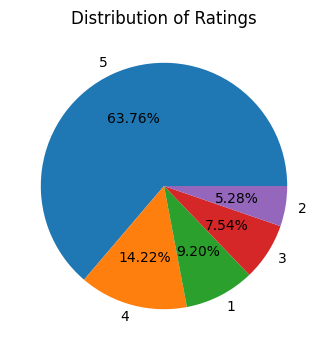

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(dfc["Score"].value_counts(),labels=dfc["Score"].value_counts().index,autopct='%1.2f%%')
plt.title("Distribution of Ratings")
plt.show()

### Around 64% of the data has 5 Score i.e. There are far more number of good reviews compared to poor reviews.

----

# **Sampling and Train-Test-Split (85:15 split)**

In [4]:
dfc = pd.read_csv("/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /cleaned_reviewtext.csv")
dfc

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,cleaned_ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1.0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,0.0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,0.0,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,fed golden retriever hated eat gave terrible d...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,0.4,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",admit sucker large quantity oz shopping hot sa...
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,0.0,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,week old gas constipation problem first week t...
...,...,...,...,...,...,...,...,...,...,...,...,...
390109,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,0.4,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,love noodle little spicy wife perfct
390110,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,0.4,5,1254096000,yummy!,I just love it and will buy another box when I...,love buy another box done last one
390111,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,0.4,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,late father law used rating system meal
390112,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,0.4,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,favorite brand korean ramen spicy used eating ...


In [5]:
dfx = dfc.sample(n=100000, random_state=42)
dfx.reset_index(drop=True, inplace=True)
dfx

,idlist,productid,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time,ReviewSummary,ReviewText,cleaned_ReviewText
0,53444,B002FBY3GE,A10IANTKPTTPBV,Jesse,0,0,0.0000,5,1263945600,The best of the lot,"Great tasting, slightly salty (delicious with ...",great tasting slightly salty delicious sweetne...
1,76854,B0001ES9FI,A2T6A1P581H1R9,Pedro A. Vera,0,0,0.0000,5,1180656000,Drink of the gods,"I consider myself very lucky, I am a degenerat...",consider lucky degenerate caffeine addict cost...
2,270896,B008J1HO4C,AI8EMB0HUC6Z5,"Tyler Forge ""realist""",2,2,1.0000,5,1233878400,mighty fine,I eat oats with some regularity (pun intended)...,eat oat regularity pun intended rolled oat fin...
3,476378,B000EVMNMI,AXGGR9Q63RIGE,Heather Randolph,0,0,0.0000,4,1328832000,arrived fresh and was good,it took a bit longer than i expected to get it...,took bit longer expected get certainly worth c...
4,80950,B001E5DYUS,AK38QHAG94QCK,rwcmick,1,1,1.0000,4,1255305600,"Ridiculous packaging, good taste","Like others, I had a sticky surprise when I op...",like others sticky surprise opened amazon box ...
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,104432,B004UOA24Q,A6WBQ8W6JWC94,D. Seroskie,1,1,1.0000,5,1305763200,Sensational!,Wonderful sensational experience - my zen mome...,wonderful sensational experience zen moment br...
99996,408301,B001CWU9HE,A3HVO3WRHOVXNW,Nancy B. Kramer,0,0,0.0000,5,1276732800,a great cracker for any occasion,Glutino Cheddar cheese crackers are one of the...,glutino cheddar cheese cracker one best cracke...
99997,52899,B001D0IZBM,A1U51SNKFBHPQR,"Kristina Journey ""Kris""",0,0,0.0000,5,1340236800,Best deal for the BEST coffee!,Such a deal on my favorite coffee! The price w...,deal favorite coffee price low shipping fast c...
99998,396416,B0009ETA6W,A19U7LQ6T03I4J,Brian G. Mccarthy,7,16,0.4375,5,1288742400,"I want larger, more feminine breasts",I have wanted to increase my breast size for a...,wanted increase breast size long time decided ...


In [6]:
# Splitting the input and output Column
x=dfx["cleaned_ReviewText"]
y=dfx["Score"]

In [7]:
# Splitting the train and test data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=1)

In [8]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(85000,) (15000,) (85000,) (15000,)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer()
bow = CountVectorizer()

# **TF-IDF**

In [10]:
x_train_tfidf = tfidf.fit_transform(x_train)

In [11]:
print("Total unique vocabs:",len(tfidf.vocabulary_))
print("Shape",x_train_tfidf.shape)

Total unique vocabs: 44558
Shape (85000, 44558)


In [12]:
x_test_tfidf = tfidf.transform(x_test)

In [13]:
print("Total unique vocabs:",len(tfidf.vocabulary_))
print("Shape",x_test_tfidf.shape)

Total unique vocabs: 44558
Shape (15000, 44558)


# **Bag Of Words**

In [14]:
x_train_bow = bow.fit_transform(x_train)

In [15]:
print("Total unique vocabs:",len(bow.vocabulary_))
print("Shape",x_train_bow.shape)

Total unique vocabs: 44558
Shape (85000, 44558)


In [16]:
x_test_bow = bow.transform(x_test)

In [17]:
print("Total unique vocabs:",len(bow.vocabulary_))
print("Shape",x_test_bow.shape)

Total unique vocabs: 44558
Shape (15000, 44558)


# **MODEL BUILDING, PREDICTION AND EVALUATION**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# **TF-IDF**

In [ ]:
KNN_tfidf = KNeighborsClassifier()
LR_tfidf = LogisticRegression(max_iter=1000)
SVC_tfidf = SVC()
DT_tfidf = DecisionTreeClassifier()
RF_tfidf = RandomForestClassifier()


# **Logistic Regression**

In [ ]:
LR_tfidf.fit(x_train_tfidf,y_train)
y_test_pred = LR_tfidf.predict(x_test_tfidf)
LR_tfidf_res = metrics.accuracy_score(y_test, y_test_pred)
print(LR_tfidf_res)

0.7128


**> TIME TAKEN TO RUN LR - 1 MIN**

# **Decision Tree Classifier**

In [ ]:
DT_tfidf.fit(x_train_tfidf,y_train)
y_test_pred = DT_tfidf.predict(x_test_tfidf)
DT_tfidf_res = metrics.accuracy_score(y_test, y_test_pred)
print(DT_tfidf_res)

0.5787333333333333


**TIME TAKEN TO RUN DT - 3 MIN**

# **KNeighbors Classifier**

In [ ]:
KNN_tfidf.fit(x_train_tfidf,y_train)
y_test_pred = KNN_tfidf.predict(x_test_tfidf)
KN_tfidf_res = metrics.accuracy_score(y_test, y_test_pred)
print(KN_tfidf_res)

0.6072666666666666


**TIME TAKEN TO RUN KNN - 24 MIN**

# **Random Forest Classifier**

In [ ]:
RF_tfidf.fit(x_train_tfidf,y_train)
y_test_pred = RF_tfidf.predict(x_test_tfidf)
RF_tfidf_res = metrics.accuracy_score(y_test, y_test_pred)
print(RF_tfidf_res)

0.6618666666666667


**TIME TAKEN TO RUN RF - 10 MIN**

# **Support Vector Classifier**

In [ ]:
SVC_tfidf.fit(x_train_tfidf,y_train)
y_test_pred = SVC_tfidf.predict(x_test_tfidf)
SVC_tfidf_res = metrics.accuracy_score(y_test, y_test_pred)
print(SVC_tfidf_res)

0.7116


**TIME TAKEN TO RUN SVC - 3 HRS**

# **XGBoost**

In [ ]:
import xgboost as xgb
XGB_tfidf = xgb.XGBClassifier()

class_mapping = {label: idx for idx, label in enumerate(set(y_train))}
y_train_mapped = [class_mapping[label] for label in y_train]
y_test_mapped = [class_mapping[label] for label in y_test]

XGB_tfidf.fit(x_train_tfidf, y_train_mapped)
y_test_pred = XGB_tfidf.predict(x_test_tfidf)
XGB_tfidf_res = metrics.accuracy_score(y_test_mapped, y_test_pred)
print(XGB_tfidf_res)

0.6974666666666667


**TIME TAKEN TO RUN XGB - 8 MIN**

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_tfidf = MultinomialNB()

NB_tfidf.fit(x_train_tfidf, y_train)
y_test_pred = NB_tfidf.predict(x_test_tfidf)
NB_tfidf_res = metrics.accuracy_score(y_test, y_test_pred)
print(NB_tfidf_res)

0.6443333333333333


**TIME TAKEN TO RUN NB - 0 MIN**

----

# **CONVERTING ALL THE SCORES INTO DATAFRAME**

In [ ]:
df_tfidf1 = pd.DataFrame({"Algorithms":["Logistic Regressor","DT Classifier","KNN Classifier"],
              "Accuracy Score TF-IDF":[LR_tfidf_res,DT_tfidf_res,KN_tfidf_res]})
df_tfidf1.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /tfidf_results_sampled.csv', index=False)
df_tfidf1

,Algorithms,Accuracy Score TF-IDF
0,Logistic Regressor,0.712800
1,DT Classifier,0.578733
2,KNN Classifier,0.607267


In [ ]:
df_tfidf1 = pd.read_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /tfidf_results_sampled.csv')
df_tfidf1

,Algorithms,Accuracy Score TF-IDF
0,Logistic Regressor,0.712800
1,DT Classifier,0.578733
2,KNN Classifier,0.607267


In [ ]:
df_tfidf = pd.DataFrame({"Algorithms":['RF Classifier',"SV Classifier"],
              "Accuracy Score TF-IDF":[RF_tfidf_res,SVC_tfidf_res]})
df_tfidf.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /tfidf_results_temp.csv', index=False)
df_tfidf

,Algorithms,Accuracy Score TF-IDF
0,RF Classifier,0.661867
1,SV Classifier,0.711600


In [ ]:
df_tfidf2 = pd.DataFrame({
    "Algorithms": [ "XGBoost", "Naive Bayes"],
    "Accuracy Score TF-IDF": [XGB_tfidf_res, NB_tfidf_res]})

df_tfidf2.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /tfidf_results_sampled_extra.csv', index=False)
df_tfidf2

,Algorithms,Accuracy Score TF-IDF
0,XGBoost,0.697467
1,Naive Bayes,0.644333


In [ ]:
df_tfidf_final = pd.concat([df_tfidf1, df_tfidf, df_tfidf2], ignore_index=True)
df_tfidf_final.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /tfidf_results_sampled_final.csv', index=False)
df_tfidf_final

,Algorithms,Accuracy Score TF-IDF
0,Logistic Regressor,0.712800
1,DT Classifier,0.578733
2,KNN Classifier,0.607267
3,RF Classifier,0.661867
4,SV Classifier,0.711600
5,XGBoost,0.697467
6,Naive Bayes,0.644333


In [ ]:
df_tfidf_final

,Algorithms,Accuracy Score TF-IDF
0,Logistic Regressor,0.712800
1,DT Classifier,0.578733
2,KNN Classifier,0.607267
3,RF Classifier,0.661867
4,SV Classifier,0.711600
5,XGBoost,0.697467
6,Naive Bayes,0.644333


## **OBSERVATIONS**
- The fastest trained model was `Naive Bayes`.

----

# **BAG OF WORDS**

In [19]:
KNN_bow = KNeighborsClassifier()
LR_bow = LogisticRegression(max_iter=1000)
SVC_bow = SVC()
DT_bow = DecisionTreeClassifier()
RF_bow = RandomForestClassifier()

# **Logistic Regression**

In [20]:
LR_bow.fit(x_train_bow,y_train)
y_test_pred = LR_bow.predict(x_test_bow)
LR_bow_res = metrics.accuracy_score(y_test, y_test_pred)
print(LR_bow_res)

0.6909333333333333


**TIME TAKEN TO RUN LR - 2 MINS**

# **Decision Tree Classifier**

In [21]:
DT_bow.fit(x_train_bow,y_train)
y_test_pred = DT_bow.predict(x_test_bow)
DT_bow_res = metrics.accuracy_score(y_test, y_test_pred)
print(DT_bow_res)

0.5897333333333333


**TIME TAKEN TO RUN DT - 3 MINS**

# **Random Forest Classifier**

In [23]:
RF_bow.fit(x_train_bow,y_train)
y_test_pred = RF_bow.predict(x_test_bow)
RF_bow_res = metrics.accuracy_score(y_test, y_test_pred)
print(RF_bow_res)

0.6647333333333333


**TIME TAKEN TO RUN RF - 9 MINS**

# **KNeighbors Classifier**

In [22]:
KNN_bow.fit(x_train_bow,y_train)
y_test_pred = KNN_bow.predict(x_test_bow)
KN_bow_res = metrics.accuracy_score(y_test, y_test_pred)
print(KN_bow_res)

0.5578


**TIME TAKEN TO RUN KNN - 1 MIN**

# **Support Vector Classifier**

In [25]:
SVC_bow.fit(x_train_bow,y_train)
y_test_pred = SVC_bow.predict(x_test_bow)
SVC_bow_res = metrics.accuracy_score(y_test, y_test_pred)
print(SVC_bow_res)

0.7007333333333333


**TIME TAKEN TO RUN SVC - HR**

# **XGboost**

In [27]:
import xgboost as xgb
XGB_bow = xgb.XGBClassifier()

class_mapping = {label: idx for idx, label in enumerate(set(y_train))}
y_train_mapped = [class_mapping[label] for label in y_train]
y_test_mapped = [class_mapping[label] for label in y_test]

XGB_bow.fit(x_train_bow, y_train_mapped)
y_test_pred = XGB_bow.predict(x_test_bow)
XGB_bow_res = metrics.accuracy_score(y_test_mapped, y_test_pred)
print(XGB_bow_res)

0.6961333333333334


**TIME TAKEN TO RUN XGB - 2 MIN**

# **Naive Bayes**

In [28]:
from sklearn.naive_bayes import MultinomialNB
NB_bow = MultinomialNB()

NB_bow.fit(x_train_bow, y_train)
y_test_pred = NB_bow.predict(x_test_bow)
NB_bow_res = metrics.accuracy_score(y_test, y_test_pred)
print(NB_bow_res)

0.6872666666666667


**TIME TAKEN TO RUN NB - 0 MIN**

----

# **CONVERTING ALL THE SCORES INTO DATAFRAME**

In [24]:
df_bow = pd.DataFrame({"Algorithms":["Logistic Regressor","DT Classifier","RF Classifier","KNN Classifier"],
              "Accuracy Score BOW":[LR_bow_res,DT_bow_res,RF_bow_res,KN_bow_res]})
df_bow.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /bow_results_samples.csv', index=False)
df_bow

,Algorithms,Accuracy Score BOW
0,Logistic Regressor,0.690933
1,DT Classifier,0.589733
2,RF Classifier,0.664733
3,KNN Classifier,0.557800


In [26]:
df_bow = pd.DataFrame({"Algorithms":["Logistic Regressor","DT Classifier","RF Classifier","KNN Classifier","SV Classifier"],
              "Accuracy Score BOW":[LR_bow_res,DT_bow_res,RF_bow_res,KN_bow_res,SVC_bow_res]})
df_bow.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /bow_sampled_results.csv', index=False)
df_bow

,Algorithms,Accuracy Score BOW
0,Logistic Regressor,0.690933
1,DT Classifier,0.589733
2,RF Classifier,0.664733
3,KNN Classifier,0.557800
4,SV Classifier,0.700733


In [31]:
df_bow1 = pd.DataFrame({
    "Algorithms": [ "XGBoost", "Naive Bayes"],
    "Accuracy Score BOW": [XGB_bow_res, NB_bow_res]})

df_bow1.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /bow_results_sampled_extra.csv', index=False)
df_bow1

,Algorithms,Accuracy Score BOW
0,XGBoost,0.696133
1,Naive Bayes,0.687267


In [32]:
df_bow_final = pd.concat([df_bow, df_bow1], ignore_index=True)
df_bow_final.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /bow_results_sampled_final.csv', index=False)
df_bow_final

,Algorithms,Accuracy Score BOW
0,Logistic Regressor,0.690933
1,DT Classifier,0.589733
2,RF Classifier,0.664733
3,KNN Classifier,0.557800
4,SV Classifier,0.700733
5,XGBoost,0.696133
6,Naive Bayes,0.687267


# **OBSERVATIONS**
- We can observe that the `SVC` model takes the longest time to train.

----

# **COMPARISION OF SCORES BETWEEN TF-IDF AND BAG OF WORDS TRAINED MODELS**

In [36]:
df_tfidf_final = pd.read_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /sampled_tfidf_final_results.csv')
df_tfidf_final

,Algorithms,Accuracy Score TF-IDF
0,Logistic Regressor,0.712800
1,DT Classifier,0.578733
2,KNN Classifier,0.607267
3,RF Classifier,0.661867
4,SV Classifier,0.711600
5,XGBoost,0.697467
6,Naive Bayes,0.644333


In [40]:
df_bow_final = pd.read_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /sampled_bow_final_results.csv')
df_bow_final

,Algorithms,Accuracy Score BOW
0,Logistic Regressor,0.690933
1,DT Classifier,0.589733
2,RF Classifier,0.664733
3,KNN Classifier,0.557800
4,SV Classifier,0.700733
5,XGBoost,0.696133
6,Naive Bayes,0.687267


In [37]:
comparision = pd.merge(df_tfidf_final,df_bow_final,on="Algorithms",how="left")
comparision.columns = ["Algorithms","TF-IDF ACCURACY","BOW ACCURACY"]

In [39]:
comparision.to_csv('/content/drive/MyDrive/PROJECT-4 SENTIMENT ANALYSIS /compared_results.csv', index=False)

In [38]:
comparision

,Algorithms,TF-IDF ACCURACY,BOW ACCURACY
0,Logistic Regressor,0.712800,0.690933
1,DT Classifier,0.578733,0.589733
2,KNN Classifier,0.607267,0.557800
3,RF Classifier,0.661867,0.664733
4,SV Classifier,0.711600,0.700733
5,XGBoost,0.697467,0.696133
6,Naive Bayes,0.644333,0.687267
